In [32]:
from selfweed.data import get_dataset

from PIL import Image
import skimage as ski
import torch

import lovely_tensors as lt
import numpy as np
from lovely_numpy import lo

lt.monkey_patch()

In [4]:
dataset_params = {
    "fields": ["000", "001", "002", "003", "004"],
    "modality": "New Dataset",
    "root": "dataset/patches/512",
}

dataset = get_dataset(**dataset_params)

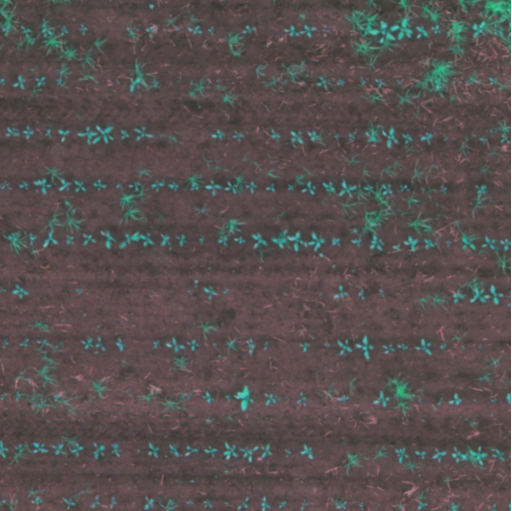

In [55]:
elem = dataset[10]
rgb = elem['image'][2:].permute(1, 2, 0).numpy()
lo(rgb).rgb

1310


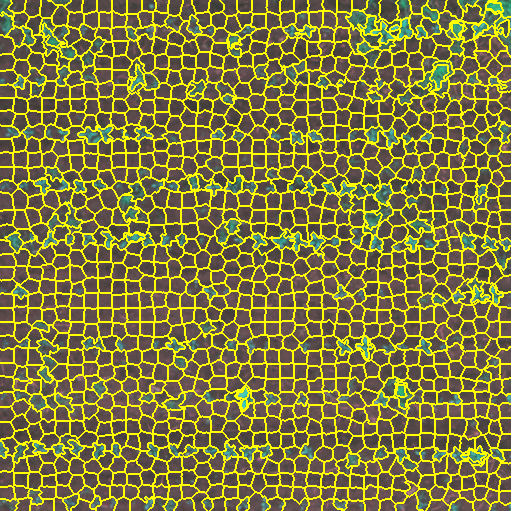

In [70]:
percent = 0.005
N = int(np.prod(rgb.shape[:-1]) * percent)
print(N)
seg = ski.segmentation.slic(rgb, n_segments=N, compactness=20, sigma=1)
boundaries = ski.segmentation.mark_boundaries(rgb, seg)
torch.tensor(seg).unsqueeze(0).repeat(3, 1, 1).rgb
lo(boundaries).rgb